# Line charts and dates


Line charts are excellent at showing time series data -- data that changes by date or time. And there are two ways of dealing with time series data -- the easy way and the right way. 

First, the easy way. 

In [1]:
library(ggplot2)

In [2]:
enrollment <- read.csv("../../Data/enrollment.csv")

In [3]:
head(enrollment)

Year,Date,Enrollment
1967,1967-1-1,18067
1968,1968-1-1,19150
1969,1969-1-1,19618
1970,1970-1-1,20810
1971,1971-1-1,21541
1972,1972-1-1,21581


What we have here is enrollment at UNL since 1967. And, as you can see, I've already pulled the year into a field. So plotting this on a line chart is simply a matter of changing the geometry from what we've previously done to `geom_line`. 

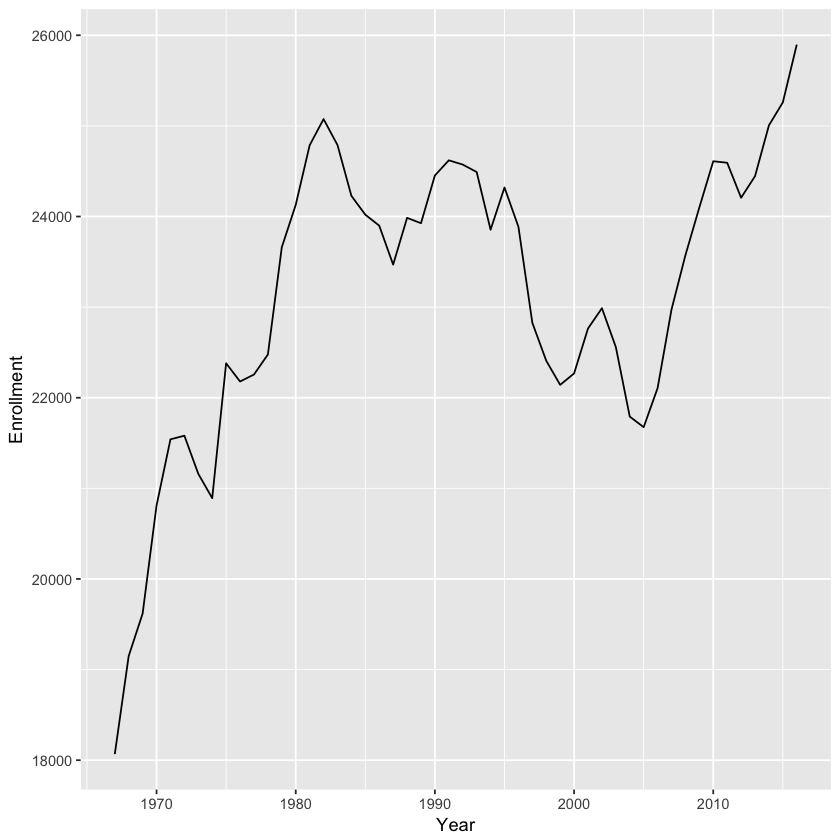

In [6]:
ggplot(enrollment, aes(x=Year, y=Enrollment)) + geom_line()

But what's the problem with this? Where does the Y axis start? Does this chart tell the story of enrollments at UNL over time? 

Short answer: No. It makes it look wildly erratic. It's anything but. So we need to change our Y axis scale. And to do that, we introduce `scale_y_continuous` and `scale_x_continuous` as commands that we can chain to this. 

In this, we're going to create a vector -- a collection of elements -- that set our lower and upper bounds of our variable. So lets start it at 0 and end it at 30,000, which is about 4,000 higher than our max value. Why that? It gives the top a litle space. We could set it to 27,000 or 100,000. What you set it as is what you need to tell the truth about the data. So the code you are adding is `+ scale_y_continuous(limits = c(0, 30000))` and, for purposes of this example, you can do `scale_x_continuous` too, though it has no real effect: `+ scale_x_continuous(limits = c(1967, 2016))`. 

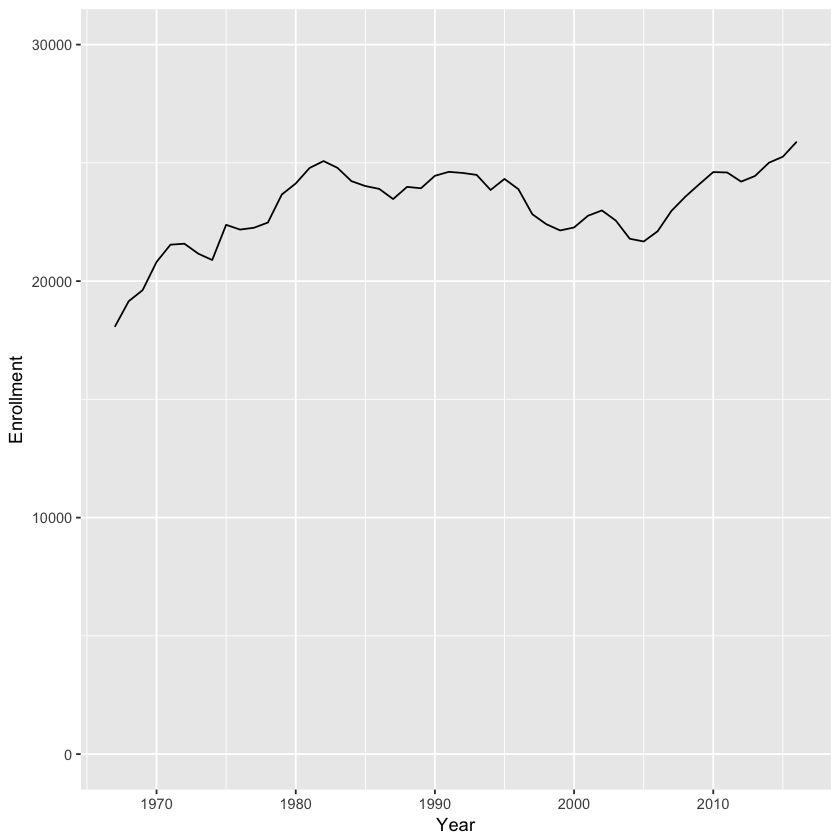

In [28]:
ggplot(enrollment, aes(x=Year, y=Enrollment)) + geom_line() + scale_y_continuous(limits = c(0, 30000)) + scale_x_continuous(limits = c(1967, 2016)) 

Note how much flatter the line is? That's more like what enrollment looks like. Up and down, but relatively stable.

## Introducing Labels

Labels are important to graphics. Clear labeling of your X and Y axis and a clear title are essential to graphics and your grade. Adding them uses the labs (short for labels) element that you can chain to your graphic. You can explicitly change the x, y and title labels pretty simply.

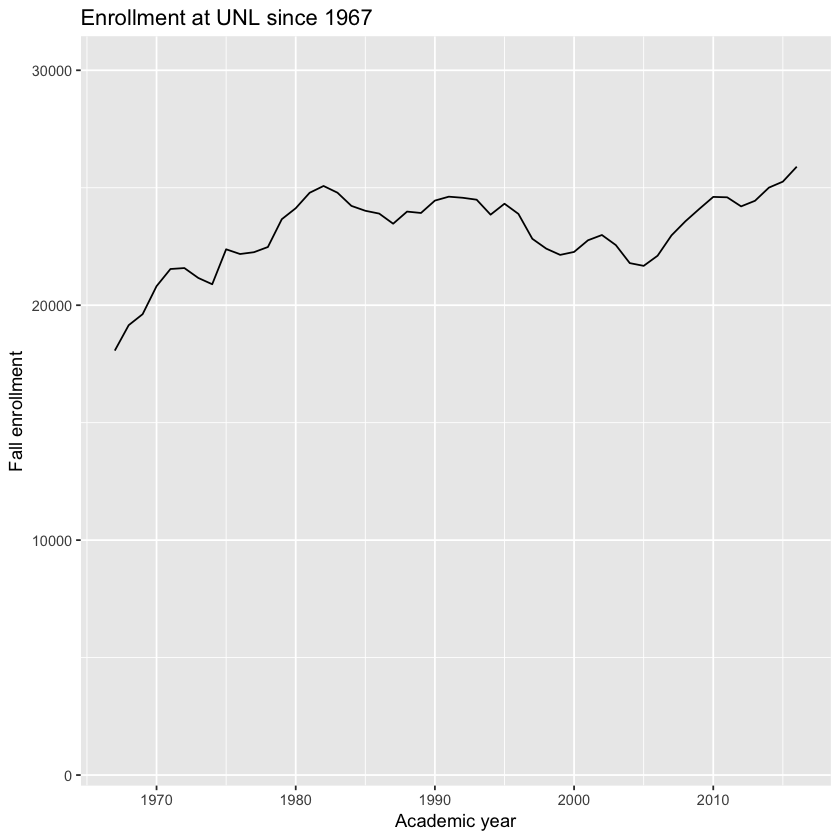

In [30]:
ggplot(enrollment, aes(x=Year, y=Enrollment)) + geom_line() + scale_y_continuous(limits = c(1000, 30000)) + scale_x_continuous(limits = c(1967, 2016)) + labs(x="Academic year", y="Fall enrollment", title="Enrollment at UNL since 1967") 

## The right way

The right way to deal with dates in line charts is to convert them to dates during your processing. So let's look at the daily flow of parking tickets on campus. First we'll need to do some data work that you've seen before -- using dpylr to mutate a field with a date without the time. 

In [9]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [10]:
tickets <- read.csv("../../Data/tickets.csv")

In [11]:
head(tickets)

Citation,Date,Location,Violation
15078429,2012-04-02 07:15:00,North Stadium,Expired Meter
24048318,2012-04-02 07:22:00,Housing,No Valid Permit Displayed
24048320,2012-04-02 07:26:00,14th & W Street,No Valid Permit Displayed
15078430,2012-04-02 07:36:00,Champions Club,Parking in Unauthorized Area
18074937,2012-04-02 07:39:00,Sandoz,Expired Meter
18074938,2012-04-02 07:40:00,Sandoz,Expired Meter


In [13]:
ticketsbyday <- tickets %>% mutate(
    shortdate = format(as.POSIXct(Date, format="%Y-%m-%d")),
) %>% group_by(shortdate) %>% summarize(
    count = n()
)

In [31]:
head(ticketsbyday)

shortdate,count
2012-04-02,207
2012-04-03,154
2012-04-04,172
2012-04-05,251
2012-04-06,167
2012-04-09,177


But look at this -- that shortdate still isn't a date. It's a character field. 

In [16]:
sapply(ticketsbyday, class)

shortdate       count 
"character"   "integer"

So what do you do? You can manipulate data in your ggolot steps to turn them into the data you need. So, in this case, we can turn our x variable into a date by using `as.Date` or `as.POSIXct` or `lubridate` if we want. In this case, `as.Date` works just fine. 

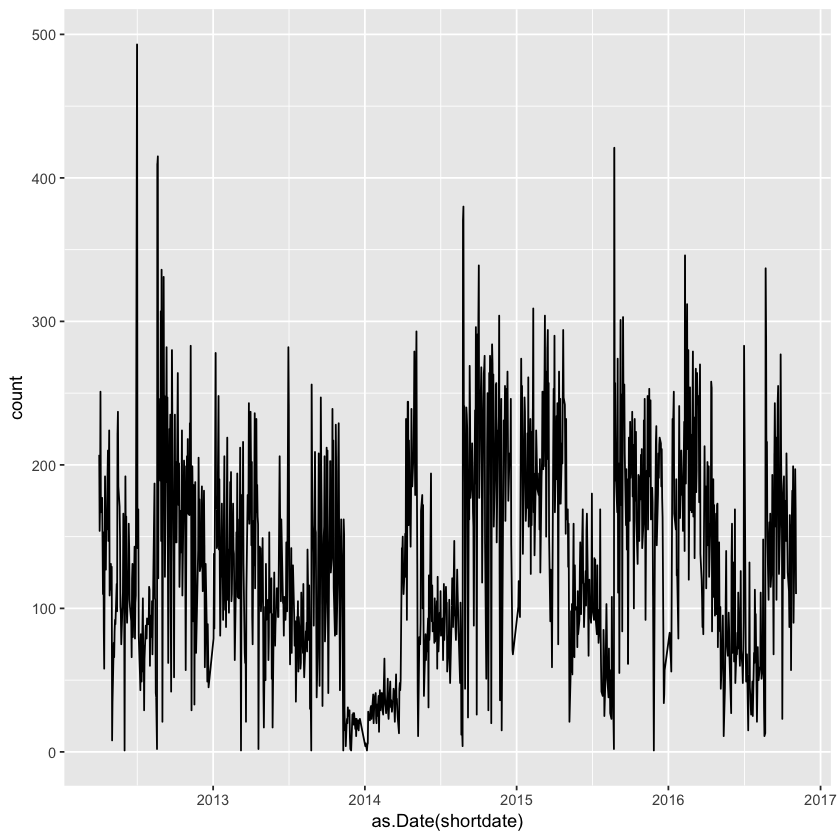

In [33]:
ggplot(ticketsbyday, aes(x=as.Date(shortdate), y=count)) + geom_line()

One last thing -- we can do better on labels. Let's say we want some notion of where we are in the year, so we'd rather have lables that give us a month and a year. We can do that using `scale_x_date` and within that, set `date_labels` and `date_breaks`. More on that here: http://ggplot2.tidyverse.org/reference/scale_date.html

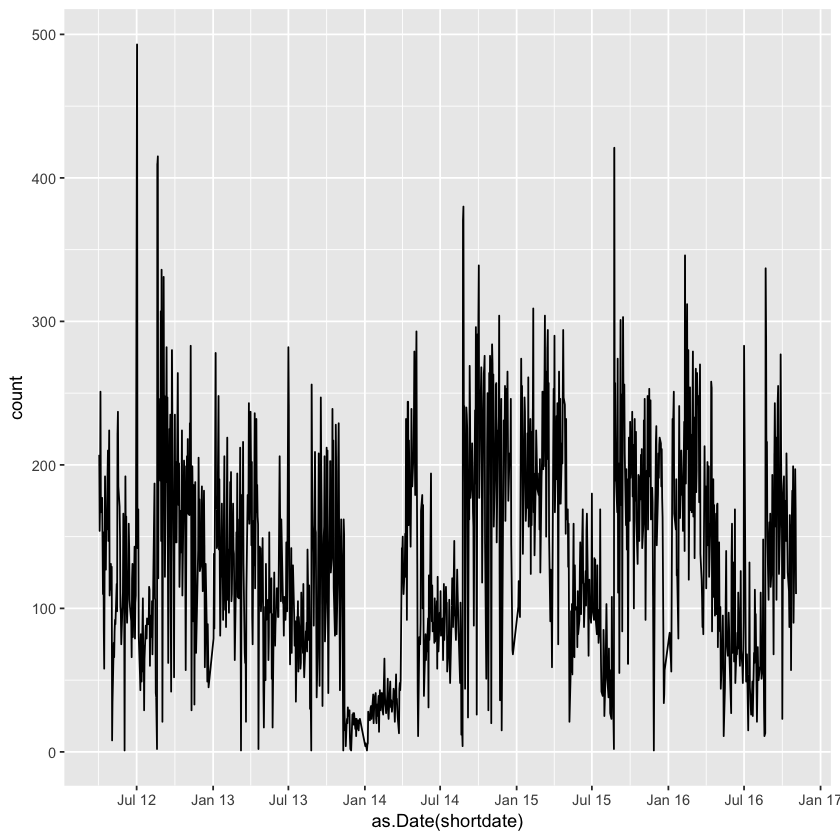

In [36]:
ggplot(ticketsbyday, aes(x=as.Date(shortdate), y=count)) + geom_line() + scale_x_date(date_labels="%b %y", date_breaks="6 months")

Let's now clean up our labels.

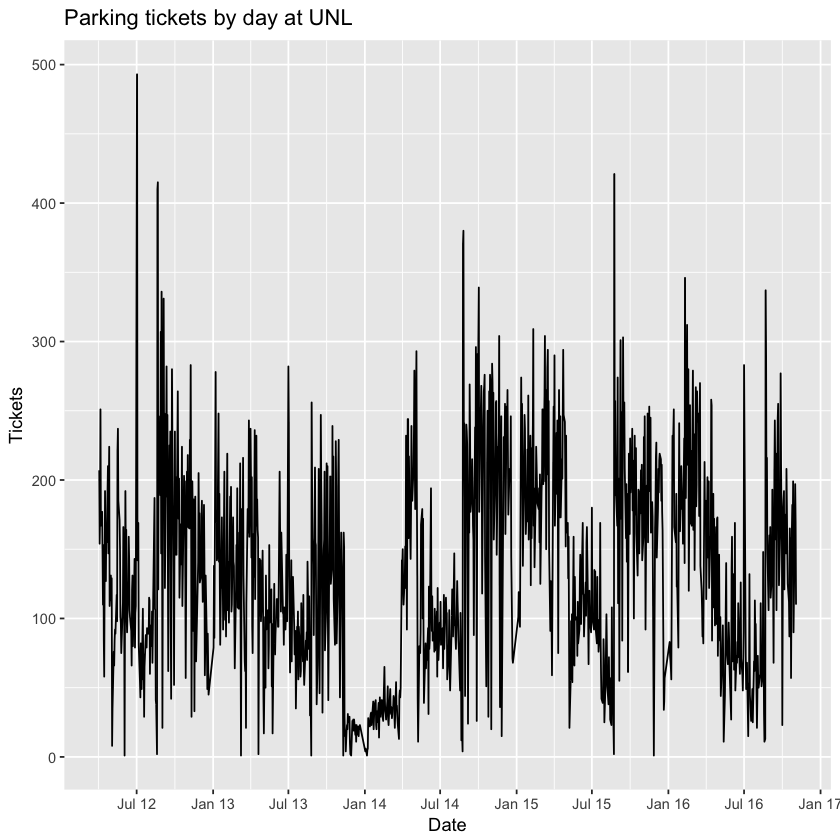

In [38]:
ggplot(ticketsbyday, aes(x=as.Date(shortdate), y=count)) + geom_line() + scale_x_date(date_labels="%b %y", date_breaks="6 months") + labs(x="Date", y="Tickets", title="Parking tickets by day at UNL")

## Assignment

This parking tickets by day is a little noisy. What would it look like if you:

1. Grouped it by month? 
2. Or week? What does that graph look like?
3. How would you label the parts? 

### Rubric
1. Did you import the data correctly?
2. Did you manipulate the data correctly?
3. Did you chart the data?
4. Did you change the colors correctly and produce the required charts?
5. Did you explain your steps in Markdown comments?